<h1>hw</h1>

In [293]:
import numpy as np
import pandas as pd
import seaborn as sns

In [294]:
features = pd.read_csv("C:/ai_dataset/titanic.csv", index_col = 0)
# C:/ai_dataset/ : 파일이 저장된 디렉토리 위치, 각자에 맞게 수정

In [295]:
features

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


<h3>데이터 전처리</h3>

<h4>결측치 여부 확인</h4>

In [296]:
features.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<h4>결측치 제거 (1)</h4>

In [297]:
## 결측치가 지나치게 많은 Feature 'Cabin' 삭제
features.drop('Cabin', axis=1, inplace=True)

In [298]:
features.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

<h4>결측치 제거 (2)</h4>

In [299]:
#Age 결측치를 중위값으로 채우기
features['Age'].fillna(features['Age'].median(), inplace = True)

#Embarked 결측치를 최빈값으로 채우기
features['Embarked'].fillna(features['Embarked'].mode()[0], inplace = True)

In [300]:
features.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

<h4>결과 확인</h4>

In [301]:
features

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [302]:
# Survived를 타겟 레이블로 삼아서 EDA 수행
# 1. Plass 레이블별 갯수 및 차트표시
# 2. 생존자와 사망자 총 숫자 및 차트표시
# 3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석
# 4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN)

<h2>Survived를 타겟 레이블로 삼아서 EDA 수행</h2>

<h3>1. Pclass 레이블별 갯수 및 차트표시</h3>

Text(0.5, 1.0, 'Pclass')

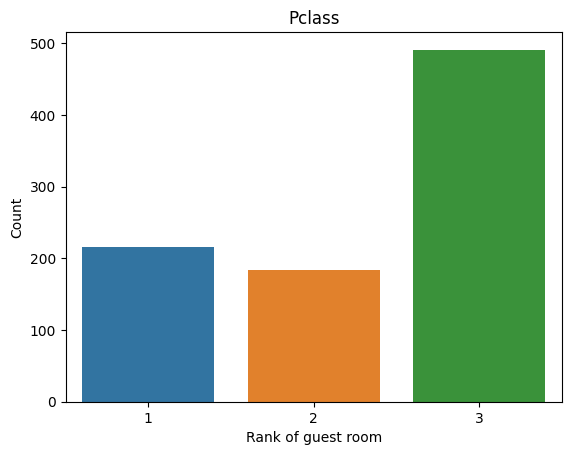

In [303]:
import matplotlib.pyplot as plt

sns.countplot(data = features, x="Pclass")
plt.xlabel("Rank of guest room")
plt.ylabel("Count")
plt.title("Pclass")

<h3>2. 생존자와 사망자 총 숫자 및 차트표시</h3>

The number of dead people -> 0
The number of alive people -> 1


0    549
1    342
Name: Survived, dtype: int64

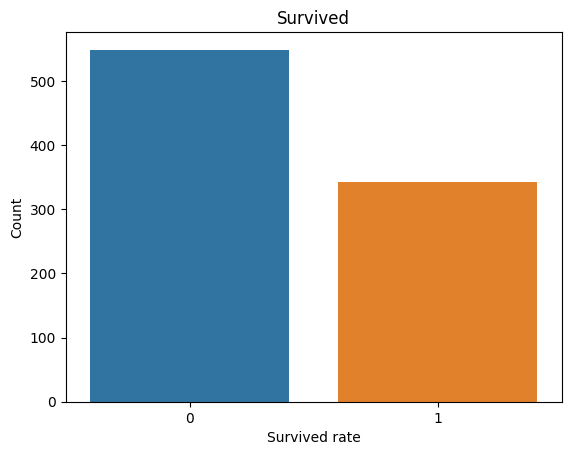

In [304]:
sns.countplot(data=features, x="Survived")
plt.xlabel("Survived rate")
plt.ylabel("Count")
plt.title("Survived")

print("The number of dead people -> 0")
print("The number of alive people -> 1")
features['Survived'].value_counts()

<h3>3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석</h3>

Text(0.5, 1.0, 'Survived')

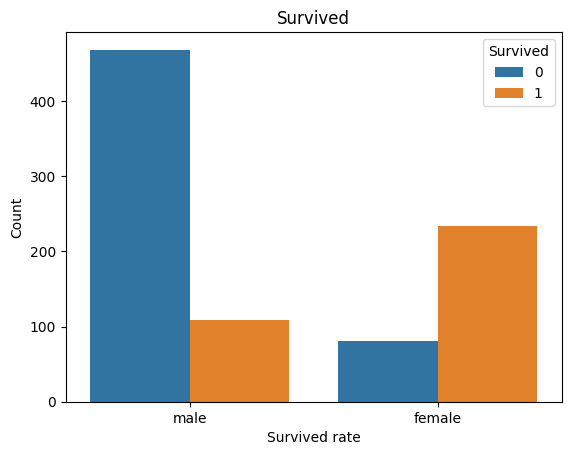

In [305]:
sns.countplot(data=features, x='Sex', hue='Survived')
plt.xlabel("Survived rate")
plt.ylabel("Count")
plt.title("Survived")

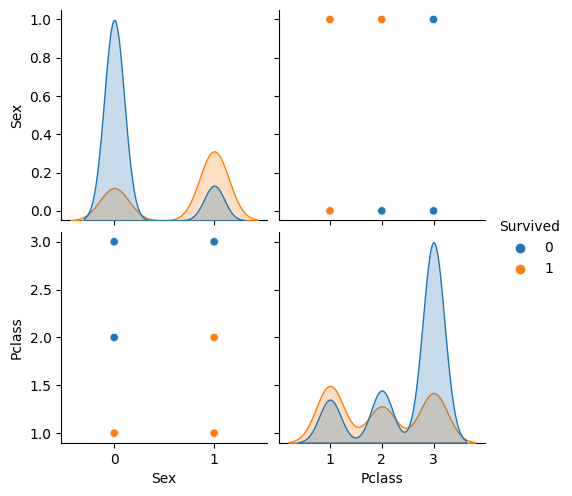

In [306]:
features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})

vars_of_interest = ['Sex', 'Pclass', 'Survived']

sns.pairplot(features[vars_of_interest], hue='Survived')

<h3>4. X_train, y_ytrain, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RF, KNN)</h3>

<h4>수치 값이 아닌 Feature 제거</h4>

In [307]:
drop_column = ['Survived', 'Name', 'Ticket', 'Embarked']

In [308]:
X=features.drop(features[drop_column], axis=1)

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,0,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,3,1,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,3,0,35.0,0,0,8.0500


In [309]:
y=features['Survived']
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<h4>X_train, y_ytrain, X_test, y_test</h4>

In [310]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [311]:
from sklearn.metrics import accuracy_score

<h3>SVM</h3>

In [312]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(accuracy_score(y_test, pred_svm))

0.7206703910614525


<h3>Logistic Regression</h3>

In [313]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print (accuracy_score(y_test, pred_lr))

0.8100558659217877


<h3>Decision Tree</h3>

In [314]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print (accuracy_score(y_test, pred_dt))

0.7932960893854749


<h3>Random Forest</h3>

In [315]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)

print(accuracy_score(y_test,pred_rf))

0.8324022346368715


<h3>KNN</h3>

In [316]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train.values.ravel())
pred_knn = knn_model.predict(X_test)

accuracy = knn_model.score(X_test, y_test)

print(accuracy)

0.7039106145251397


<h3>5. confusion Matrix를 적용</h3>
<a href="https://www.kaggle.com/code/pyarda/classification-algorithm-and-confusion-matrix">제시된 자료</a>

In [317]:
from sklearn.metrics import confusion_matrix

<h3>Confusion matrix - SVM</h3>

In [318]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

## confusion metrix
cm_svm = confusion_matrix(y_test, pred_svm)

print(cm_svm)

[[104   6]
 [ 44  25]]


<h3>Confusion matrix - Logistic Regression</h3>

In [319]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

## confusion metrix
cm_lr = confusion_matrix(y_test, pred_lr)

print(cm_lr)

[[93 17]
 [17 52]]


<h3>Confusion matrix - Decision Tree</h3>

In [320]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

## confusion metrix
cm_dt = confusion_matrix(y_test, pred_dt)

print(cm_dt)

[[95 15]
 [22 47]]


<h3>Confusion matrix - Random Forest</h3>

In [321]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)

print(accuracy_score(y_test,pred_rf))

## confusion metrix
cm_rf = confusion_matrix(y_test, pred_rf)

print(cm_dt)

0.8324022346368715
[[95 15]
 [22 47]]


<h3>Confusion matrix - KNN</h3>

In [322]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train.values.ravel())
pred_knn = knn_model.predict(X_test)

accuracy = knn_model.score(X_test, y_test)

print(accuracy)

## confusion metrix
cm_knn = confusion_matrix(y_test, pred_knn)

print(cm_knn)

0.7039106145251397
[[93 17]
 [36 33]]
